<a href="https://colab.research.google.com/github/mrigankoml/MLAP_Term-IV/blob/main/Group_6_Assignment/MLAP_Group6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/mrigankoml/MLAP_Term-IV/main/Group_6_Assignment/Tokyo%20Medals%202021.csv")
df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [12]:
pd.set_option('display.max_columns', 6)
df.head(26)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


In [8]:
df.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


In [9]:
list(df.columns)

['Country',
 'Gold Medal',
 'Silver Medal',
 'Bronze Medal',
 'Total',
 'Rank By Total']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [15]:
df[['Country','Total']][0:5]

,Country,Total
0,United States of America,113
1,People's Republic of China,88
2,Japan,58
3,Great Britain,65
4,ROC,71


In [17]:
import warnings
warnings.filterwarnings('ignore')

<BarContainer object of 93 artists>

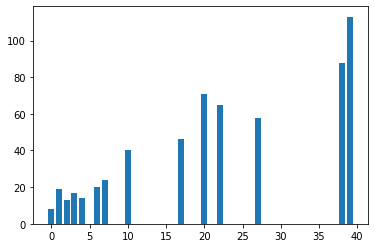

In [19]:
plt.bar(df['Gold Medal'],df['Total'])

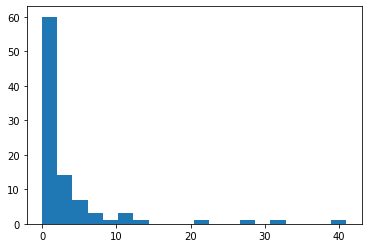

In [21]:
plt.hist(df['Silver Medal'], bins=20);

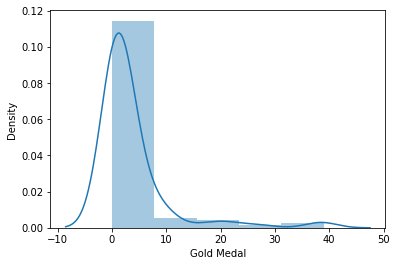

In [23]:
sn.distplot(df['Gold Medal'], bins=5);

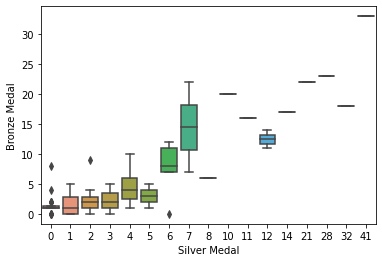

In [26]:
sn.boxplot(x='Silver Medal', y='Bronze Medal', data=df);

In [27]:
influential_features = ['Gold Medal','Silver Medal','Bronze Medal']

In [28]:
df[influential_features].corr()

,Gold Medal,Silver Medal,Bronze Medal
Gold Medal,1.000000,0.929046,0.862425
Silver Medal,0.929046,1.000000,0.862646
Bronze Medal,0.862425,0.862646,1.000000


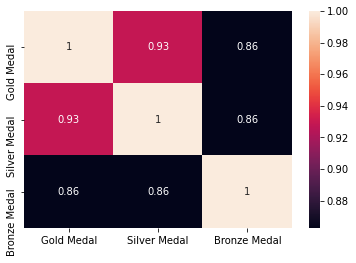

In [29]:
sn.heatmap(df[influential_features].corr(), annot=True);

In [35]:
min_threshold, max_threshold = df.Total.quantile([0.01,0.999])
min_threshold, max_threshold

(1.0, 110.70000000000039)

In [32]:
df[df.Total<min_threshold]

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total


In [33]:
df2=df[(df.Total>min_threshold) & (df.Total<max_threshold)]
df2.shape

(75, 6)

In [36]:
df2.sample(5)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
26,Islamic Republic of Iran,3,2,2,7,33
25,Croatia,3,3,2,8,29
33,Chinese Taipei,2,4,6,12,22
55,Ethiopia,1,1,2,4,47
58,Estonia,1,0,1,2,66


In [37]:
df2.Total.describe()

count    75.000000
mean     12.666667
std      16.947720
min       2.000000
25%       4.000000
50%       6.000000
75%      13.000000
max      88.000000
Name: Total, dtype: float64

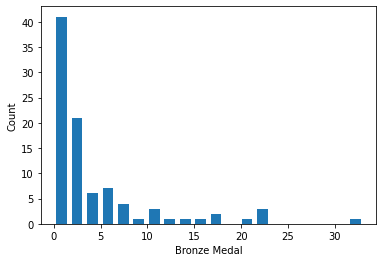

In [40]:
plt.hist(df['Bronze Medal'], bins=20, rwidth=0.7)
plt.xlabel('Bronze Medal')
plt.ylabel('Count')
plt.show()

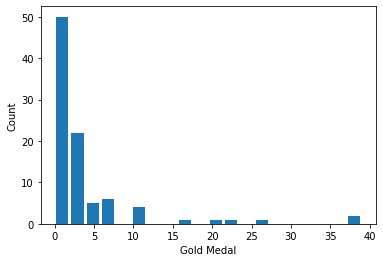

In [41]:
plt.hist(df['Gold Medal'], bins=20, rwidth=0.8)
plt.xlabel('Gold Medal')
plt.ylabel('Count')
plt.show()

In [42]:
lower_limit, upper_limit = df['Gold Medal'].quantile([0.001,0.999])
lower_limit, upper_limit

(0.0, 38.908000000000015)

In [44]:
df.set_index('Rank By Total', inplace=True)
df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
Rank By Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
5,Japan,27,14,17,58
4,Great Britain,22,21,22,65
3,ROC,20,28,23,71
...,...,...,...,...,...
77,Ghana,0,0,1,1
77,Grenada,0,0,1,1
77,Kuwait,0,0,1,1


In [47]:
new_df=df.fillna(0)
new_df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
Rank By Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
5,Japan,27,14,17,58
4,Great Britain,22,21,22,65
3,ROC,20,28,23,71
...,...,...,...,...,...
77,Ghana,0,0,1,1
77,Grenada,0,0,1,1
77,Kuwait,0,0,1,1


In [49]:
new_df=df.fillna({
        'Gold Medal': 'Nil',
        'Silver Medal': 'Nil',
})
new_df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
Rank By Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
5,Japan,27,14,17,58
4,Great Britain,22,21,22,65
3,ROC,20,28,23,71
...,...,...,...,...,...
77,Ghana,0,0,1,1
77,Grenada,0,0,1,1
77,Kuwait,0,0,1,1


In [51]:
new_df=df.fillna(method="ffill")
new_df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
Rank By Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
5,Japan,27,14,17,58
4,Great Britain,22,21,22,65
3,ROC,20,28,23,71
...,...,...,...,...,...
77,Ghana,0,0,1,1
77,Grenada,0,0,1,1
77,Kuwait,0,0,1,1


In [54]:
new_df=df.interpolate()
new_df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
Rank By Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
5,Japan,27,14,17,58
4,Great Britain,22,21,22,65
3,ROC,20,28,23,71
...,...,...,...,...,...
77,Ghana,0,0,1,1
77,Grenada,0,0,1,1
77,Kuwait,0,0,1,1


In [62]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X=sm.add_constant(df['Total'])
X.head(5)

,const,Total
Rank By Total,,
1,1.0,113
2,1.0,88
5,1.0,58
4,1.0,65
3,1.0,71


In [65]:
Y=df['Bronze Medal']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

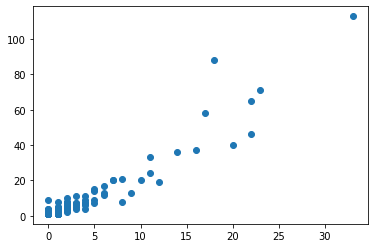

In [60]:
plt.scatter(df['Bronze Medal'],df['Total']);

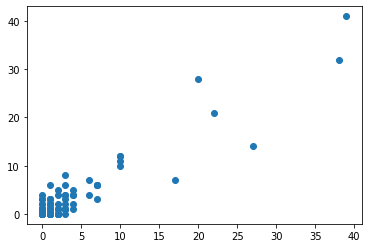

In [61]:
plt.scatter(df['Gold Medal'],df['Silver Medal']);

In [66]:
X_train

,const,Total
Rank By Total,,
29,1.0,8
47,1.0,4
39,1.0,6
17,1.0,17
47,1.0,4
...,...,...
39,1.0,6
66,1.0,2
7,1.0,40


In [67]:
X_test

,const,Total
Rank By Total,,
3,1.0,71
77,1.0,1
33,1.0,7
66,1.0,2
29,1.0,8
19,1.0,14
60,1.0,3
77,1.0,1
47,1.0,4


In [68]:
Y_train

Rank By Total
29     8
47     2
39     3
17     6
47     4
      ..
39     4
66     1
7     20
60     1
66     0
Name: Bronze Medal, Length: 74, dtype: int64

In [69]:
Y_test

Rank By Total
3     23
77     0
33     2
66     1
29     2
19     5
60     2
77     0
47     2
4     22
77     0
66     0
33     4
66     1
77     1
77     1
47     3
60     0
23     4
Name: Bronze Medal, dtype: int64